![image](body.png)

# Body Fat

Today's increase in food consumption affects human body fat. Effect of that
some body part of people measurement change. So, hospitals are trying to
make a new survey about human body fat. The result of the survey is that
they collect information about their body fat and other body specifications.
Now they want to see the relation of this data with body fat.

### Introduction 🌟:

Brief introduction explaining the context of the analysis and the objective.


### Import Libraries 📚:

Importing necessary libraries for data manipulation, statistical analysis, and visualization.

In [1]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Setting Pandas Display Options ⚙️:

Setting display options for pandas to control how dataframes are displayed.

In [2]:
def pandas_displayops():
    pd.set_option('display.max_columns', None)
    pd.set_option("display.max_rows", None)
    pd.set_option('display.width', 500)
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.float_format', lambda x: "%.1f" % x)
    warnings.simplefilter(action='ignore', category=Warning)

pandas_displayops()

### Data Loading and Overview 📊:

Loading the dataset and providing an overview of its structure and contents.


In [3]:
data = pd.read_csv("surveyofbodyfat.csv")

### Data Exploration 🔍:

Exploring the data by examining its shape, data types, and the first few rows.

In [4]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.25, 0.50, 0.75, 0.95, 0.99, 1]).T)
    print("##################### Nunique #####################")
    print(dataframe.nunique())

check_df(data)

##################### Shape #####################
(252, 15)
##################### Types #####################
Density    float64
BodyFat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Hip        float64
Thigh      float64
Knee       float64
Ankle      float64
Biceps     float64
Forearm    float64
Wrist      float64
dtype: object
##################### Head #####################
   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen   Hip  Thigh  Knee  Ankle  Biceps  Forearm  Wrist
0      1.1     12.3   23   154.2    67.8  36.2   93.1     85.2  94.5   59.0  37.3   21.9    32.0     27.4   17.1
1      1.1      6.1   22   173.2    72.2  38.5   93.6     83.0  98.7   58.7  37.3   23.4    30.5     28.9   18.2
2      1.0     25.3   22   154.0    66.2  34.0   95.8     87.9  99.2   59.6  38.9   24.0    28.8     25.2   16.6
3      1.1     10.4   26   184.8    72.2  37.4  101.8     86.4 101.2   60.1  37.3   22.8  

### Data Cleaning 🧹:

Performing data cleaning tasks such as handling missing values and outliers.

In [5]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] > up_limit) | (dataframe[variable] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in data.select_dtypes(include=['float64', 'int64']):
    if check_outlier(data, col):
        replace_with_thresholds(data, col)

### Outlier Analysis 📉  Boxplot Visualization of Outliers 📊  Outlier Detection and Removal Methods 🔍🔄

Conducting outlier analysis to identify and handle outliers in the data.

Utilizing Interquartile Range (IQR) and Z-Score methods for outlier detection and removal.

Visualizing outliers using boxplots to understand their distribution.

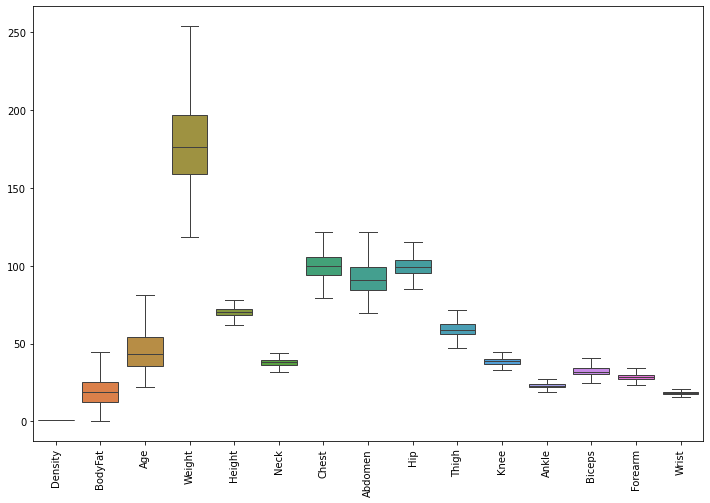

In [13]:
# Boxplot Visualization of Outliers 
plt.figure(figsize=(12,8))
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

# Detection of outliers with IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR

# Removal of outliers
data_cleaned = data[~((data < low_limit) | (data > up_limit)).any(axis=1)]

# Detection of outliers with Z-Score method
z_scores = np.abs(stats.zscore(data.select_dtypes(include=np.number)))
data_cleaned_zscore = data[(z_scores < 3).all(axis=1)]

In [14]:
# Checking the results
print("Original data size:", data.shape)
print("Data size after IQR method:", data_cleaned.shape)
print("Data size after Z-Score method:", data_cleaned_zscore.shape)

Original data size: (252, 15)
Data size after IQR method: (252, 15)
Data size after Z-Score method: (250, 15)


## Correlation Analysis 🔍📊
Analysis of the correlation between body fat and other variables.


In [7]:
correlation_matrix = data.corr()
bodyfat_correlation = correlation_matrix['BodyFat']
print("\nCorrelation between Body Fat Percentage and Other Variables:\n", bodyfat_correlation)


Correlation between Body Fat Percentage and Other Variables:
 Density   -1.0
BodyFat    1.0
Age        0.3
Weight     0.6
Height    -0.0
Neck       0.5
Chest      0.7
Abdomen    0.8
Hip        0.6
Thigh      0.6
Knee       0.5
Ankle      0.3
Biceps     0.5
Forearm    0.4
Wrist      0.3
Name: BodyFat, dtype: float64


### Regression Analysis 📈:
Analysis to model the relationship between body fat and predictor variables.

In [8]:
X = data[['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']]
y = data['BodyFat']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print("\nRegression Model Summary:\n", model.summary())


Regression Model Summary:
                             OLS Regression Results                            
Dep. Variable:                BodyFat   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     56.70
Date:                Sun, 19 May 2024   Prob (F-statistic):           2.99e-65
Time:                        01:53:25   Log-Likelihood:                -713.61
No. Observations:                 252   AIC:                             1455.
Df Residuals:                     238   BIC:                             1505.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9332   

# **Regression Model Summary Analysis** 📊🔍:

This regression model aims to predict body fat percentage based on various predictor variables. Here's a detailed analysis and interpretation of the model summary:

- **R-squared and Adjusted R-squared**: The R-squared value of 0.756 indicates that approximately 75.6% of the variance in body fat percentage can be explained by the predictor variables in the model. The adjusted R-squared, which accounts for the number of predictors in the model, is 0.743. This suggests that the model's explanatory power remains high even after considering the degrees of freedom.

- **F-statistic and Prob (F-statistic)**: The F-statistic of 56.70 with a very low p-value (2.99e-65) indicates that the overall model is statistically significant. This means that at least one of the predictor variables has a significant effect on body fat percentage.

- **Coefficients**: The coefficients represent the effect of each predictor variable on the body fat percentage while holding other variables constant. For example:
  - The coefficient for 'Age' is 0.0750, indicating that for each year increase in age, there is a corresponding increase of 0.0750 units in body fat percentage, holding other variables constant.
  - The coefficient for 'Abdomen' is 0.8911, indicating that for each unit increase in abdomen circumference, there is a corresponding increase of 0.8911 units in body fat percentage, holding other variables constant.
  - The coefficient for 'Wrist' is -1.7642, indicating that for each unit increase in wrist circumference, there is a corresponding decrease of 1.7642 units in body fat percentage, holding other variables constant.

- **P-values (P>|t|)**: The p-values associated with each coefficient test the null hypothesis that the coefficient is equal to zero (i.e., the variable has no effect on body fat percentage). A p-value less than the chosen significance level (e.g., 0.05) indicates that the coefficient is statistically significant. For example:
  - The p-value for 'Age' is 0.020, suggesting that age has a significant effect on body fat percentage.
  - The p-value for 'Chest' is 0.311, indicating that chest circumference may not have a significant effect on body fat percentage.

- **Omnibus, Durbin-Watson, Jarque-Bera, and Kurtosis**: These statistics provide information about the normality and autocorrelation of the residuals. For example, the Omnibus test tests the null hypothesis that the residuals are normally distributed, while the Durbin-Watson statistic tests for the presence of autocorrelation in the residuals.

- **Condition Number**: The condition number tests for multicollinearity among the predictor variables. A large condition number (e.g., 2.39e+04) suggests multicollinearity issues, which may affect the stability and interpretability of the coefficients.

Overall, this regression model provides valuable insights into the relationship between predictor variables and body fat percentage. However, caution should be exercised in interpreting the coefficients and model statistics, particularly in the presence of multicollinearity and non-normality of residuals.

#### Visualization of Correlation Matrix 📊
Visualization of the correlation matrix to explore variable relationships.

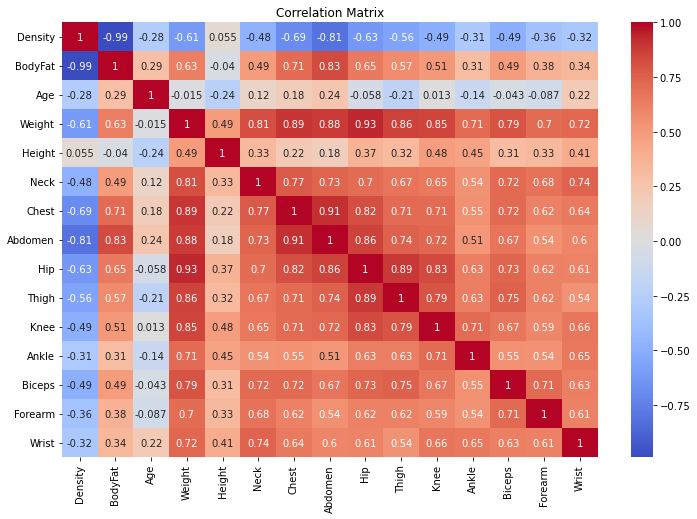

In [9]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Visualization of Variables with Highest Correlation 🔍📊
Visualization of variables with the highest correlation with body fat.

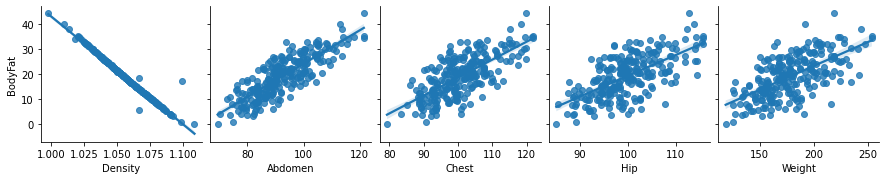

In [10]:
top_features = bodyfat_correlation.abs().sort_values(ascending=False).index[1:6]
sns.pairplot(data, x_vars=top_features, y_vars='BodyFat', kind='reg')
plt.show()

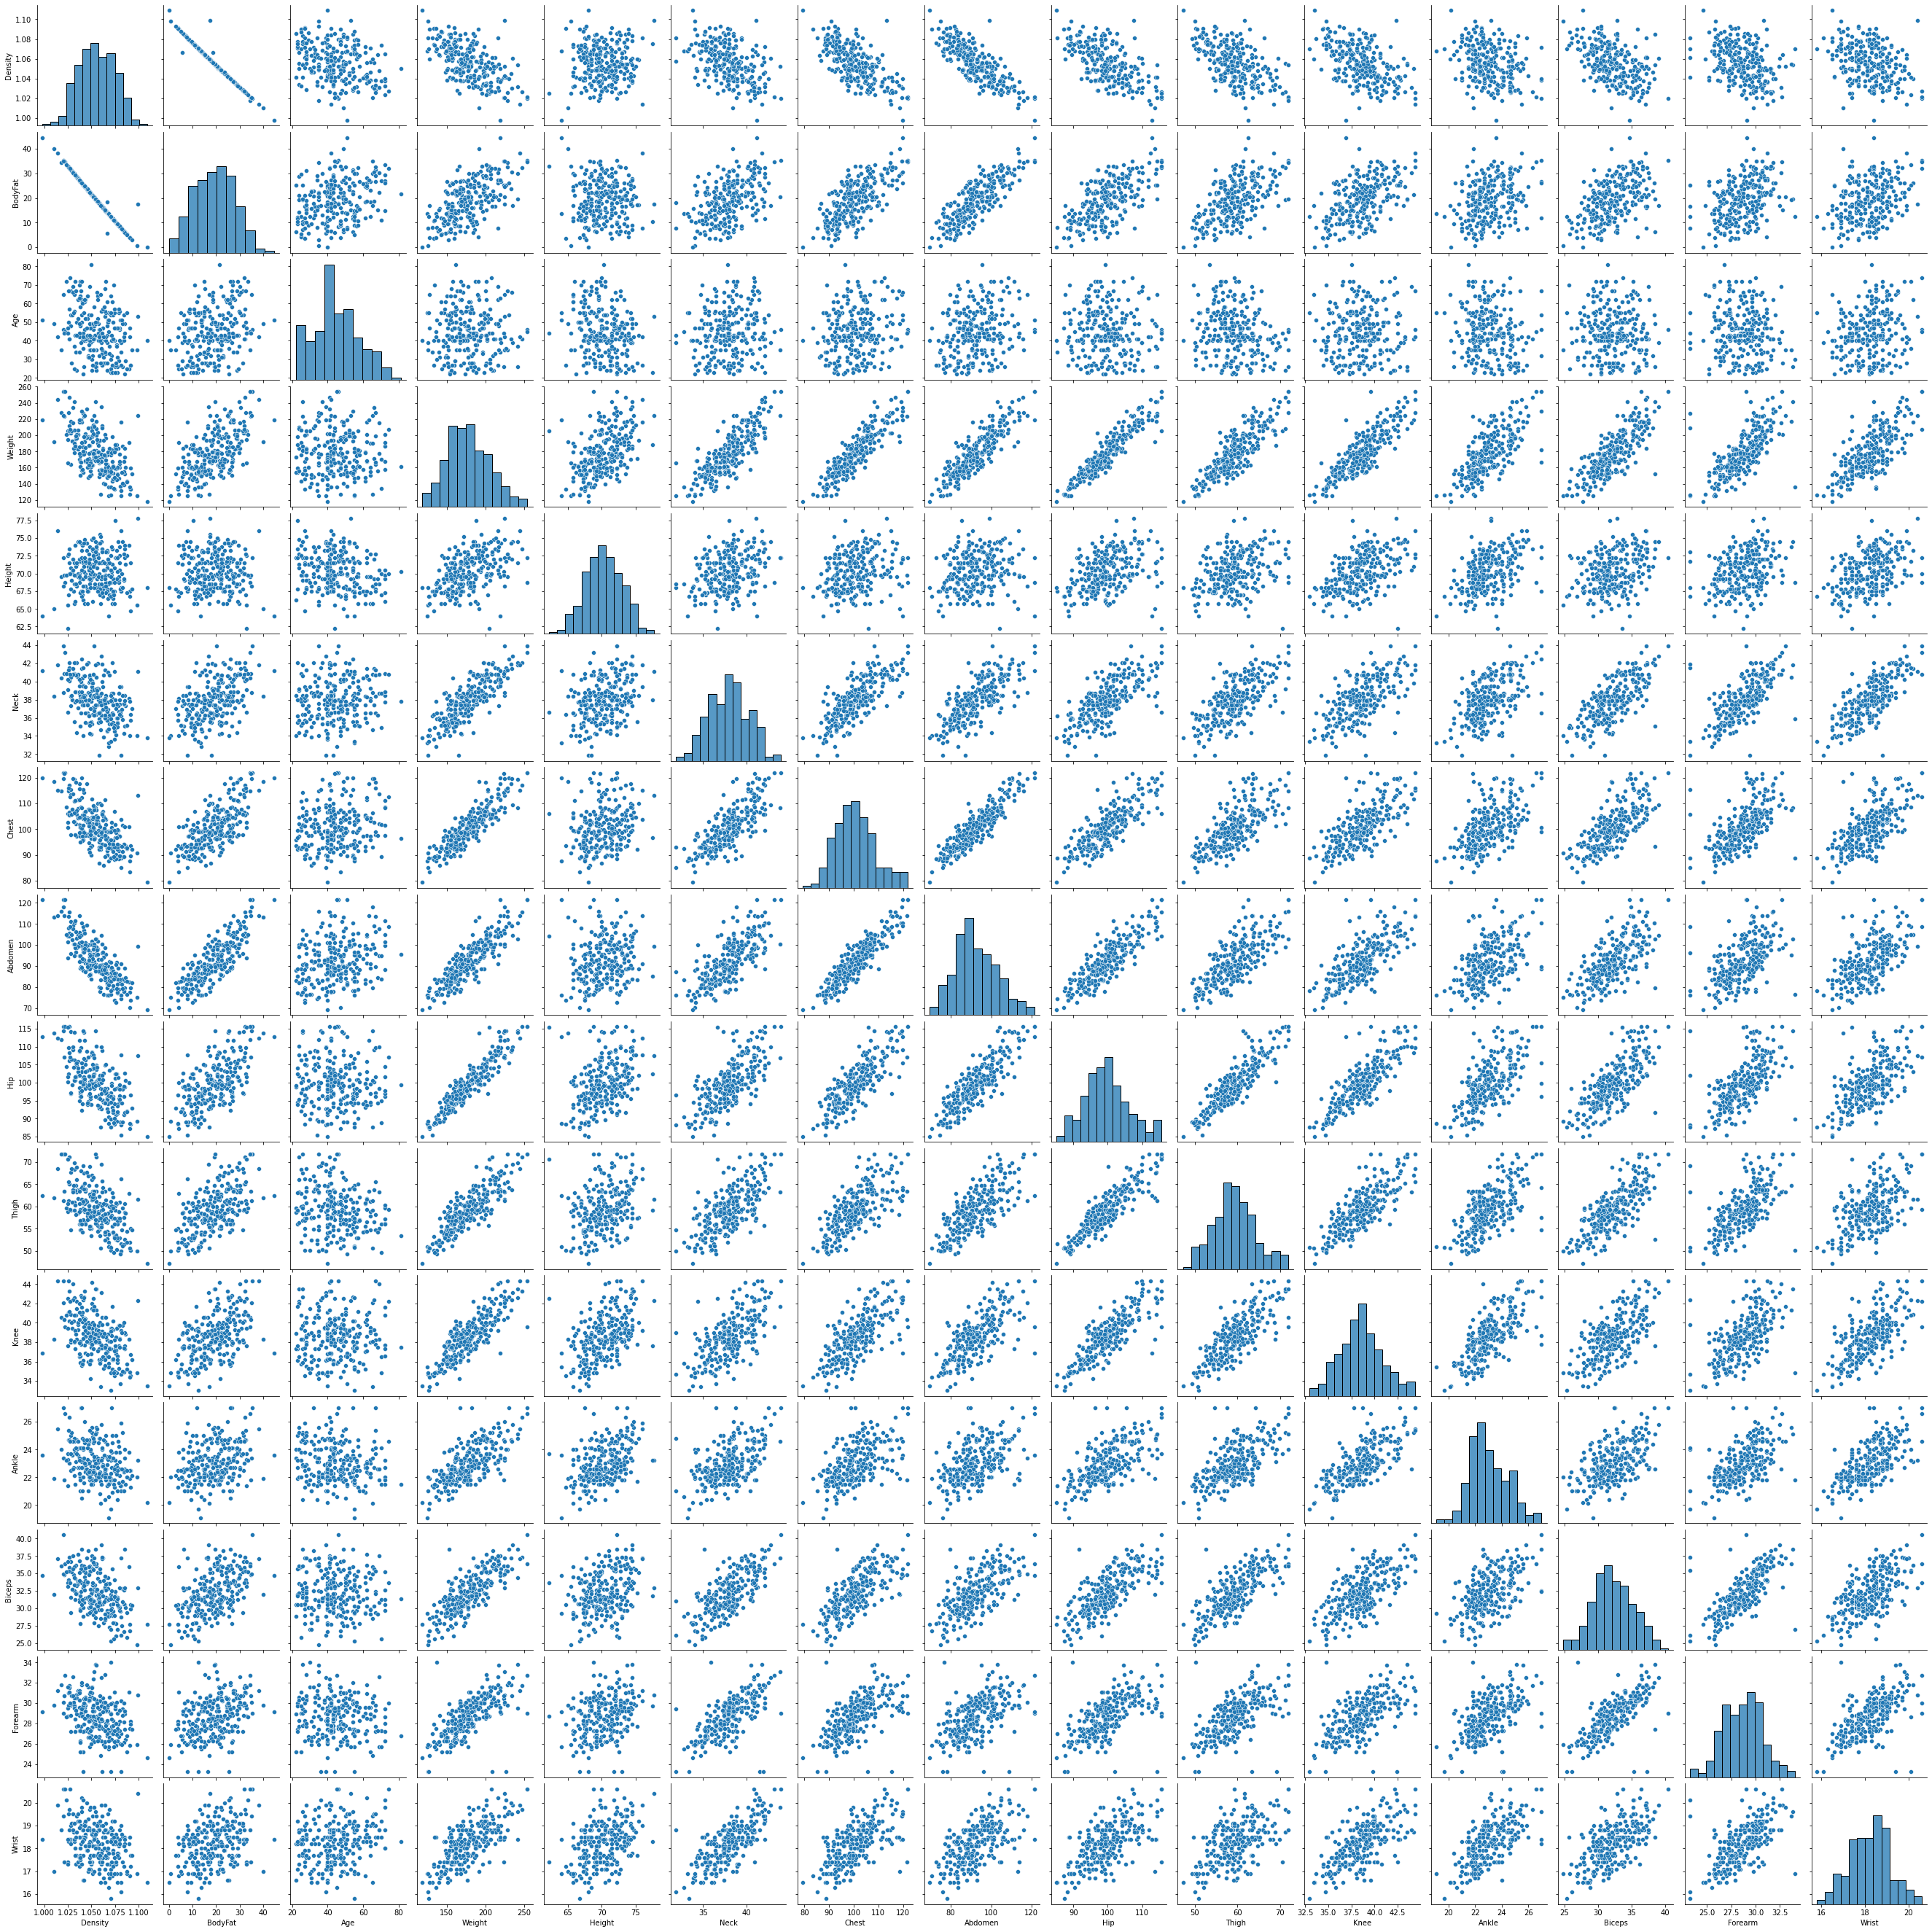

In [11]:
sns.pairplot(data)
plt.show()


In [12]:
features = data[['Density', 'Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist']]
target = data['BodyFat']

model = LinearRegression()
model.fit(features, target)

# Coefficients
coef = pd.DataFrame(model.coef_, features.columns, columns=['Coefficient'])
print(coef)


         Coefficient
Density       -409.1
Age              0.0
Weight           0.0
Height          -0.0
Neck            -0.0
Chest            0.0
Abdomen          0.0
Hip              0.0
Thigh           -0.0
Knee             0.0
Ankle           -0.2
Biceps          -0.1
Forearm          0.0
Wrist            0.1


# Interpretation:

1. **Correlation Matrix**:
   - The heatmap provides a visual representation of the correlation between body fat and other variables. High correlation values (close to 1 or -1) indicate strong relationships.

2. **Pairplot**:
   - The pairplot helps visualize the pairwise relationships and distributions of the variables. It’s useful to identify patterns and potential outliers.

3. **Linear Regression**:
   - The coefficients obtained from the linear regression model indicate the impact of each variable on body fat. Positive coefficients suggest a direct relationship, while negative coefficients indicate an inverse relationship.

### Insights:

- **Strong Predictors**:
  - Variables with high absolute coefficients in the linear regression model are strong predictors of body fat. For instance, if 'Abdomen' has a high positive coefficient, it means that as abdomen circumference increases, body fat percentage is likely to increase.

- **Weak or No Relationship**:
  - Variables with low absolute coefficients or correlations close to zero have a weaker relationship with body fat.

### Conclusion:

By following this approach, you can gain insights into how different body measurements relate to body fat. This can inform health professionals about which measurements are most indicative of body fat, potentially aiding in better health assessments and personalized medical advice.